Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [430]:
NAME = "Martin Knap"
COLLABORATORS = ""

---

# Domača naloga 4: Robustno iskanje 2D objektov

1. Zgornji in spodnji prag za povezovanje robov pri Canny-jevem detektorju robov lahko avtomatsko izračunamo na podlagi statistične analize sivin v sliki. Napišite funkcijo za detekticijo robov, ki avtomatsko izračuna spodnji in zgornji prag za povezovanje robov in ju nato uporabi za detekcijo s Cannyjevim detektorjem. Z uporabo vhodne spremenljivke `thr_type` ločite med dvema načinoma določanja pragov:

  * `thr_type = 1`:
    $$ T_L = \max{(0, (1 - \sigma) m)} $$
    $$ T_H = \min{(255, (1 + \sigma) m)} $$

  * `thr_type = 2`:
    $$ T_L = T_O/2 $$
    $$ T_H = T_O $$

  kjer je $m$ mediana sivin v sliki, $\sigma=1/3$ in $T_O$ je prag pridobljen z Otsu upragovljanjem. Otsu upragovljanje avtomatsko določi prag, ki najbolje razmeji sliko na dva dela. Funkcijo poiščite v knjižnici OpenCV. Na treh lastno poiskanih slikah, ki imajo različne zahtevnosti določanja robov, primerjajte oba avtomatska načina izbire z ročno izbranima pragovoma, ki najbolje izluščita rob. Prikažite slike in izračunane slike robov, komentirajte rezultate in uspešnost avtomatskih postopkov.

Implementirajte funkcijo `canny`:

In [2]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from rvlib import showImage

def canny(iImage, thr_type):
    #iImageType = iImage.dtype
    if (thr_type == 1):
        sigma = 1/3
        m = np.median(iImage)
        Tl = np.max([0, (1 - sigma)*m])
        Th = np.min([255, (1 + sigma)*m])
        oEdge = cv.Canny(iImage, Tl, Th)
    if (thr_type == 2):
        To, img_otsu = cv.threshold(iImage,0,255,cv.THRESH_OTSU)
        Tl = To/2
        Th = To
        oEdge = cv.Canny(iImage, Tl, Th)
    return oEdge

Prikažite originale izbranih slik in izračunane slike robov na oba načina (`thr_type = 1` in `thr_type = 2`):

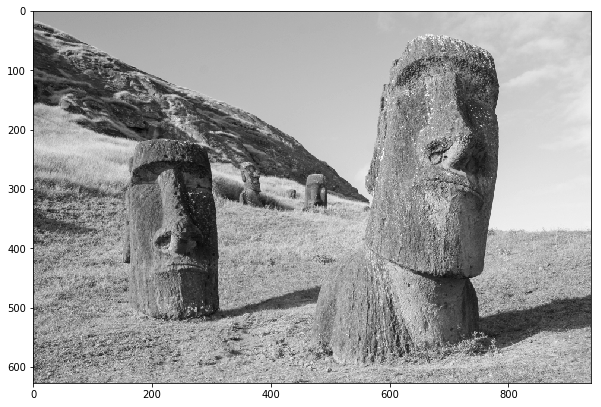

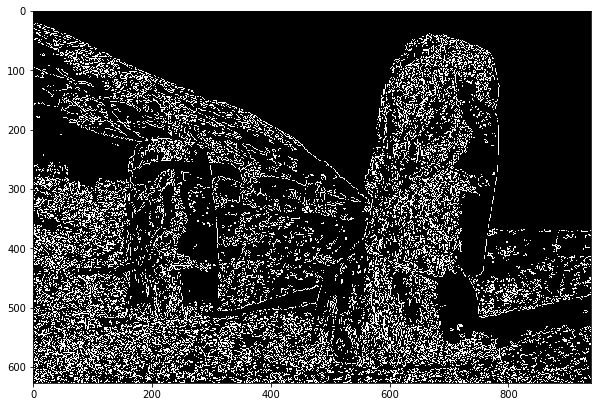

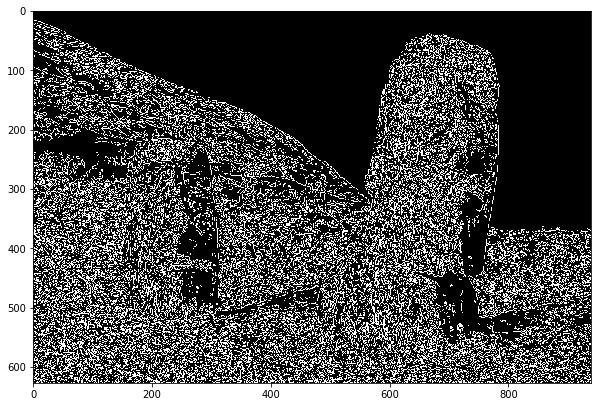

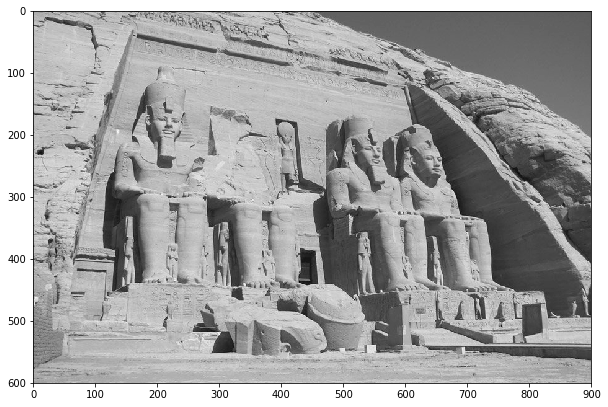

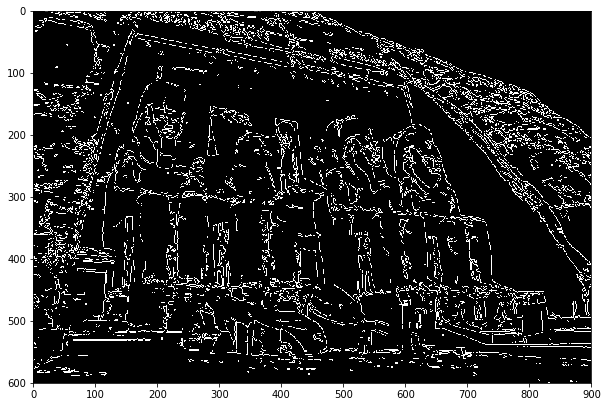

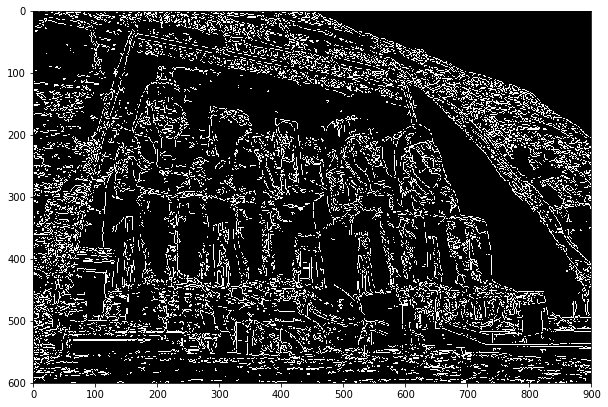

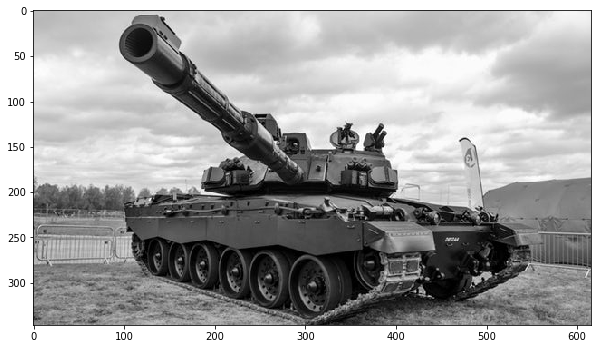

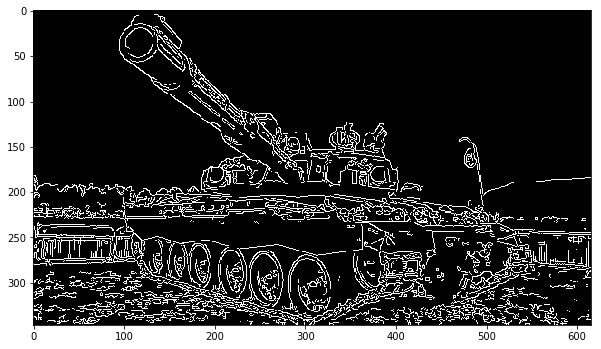

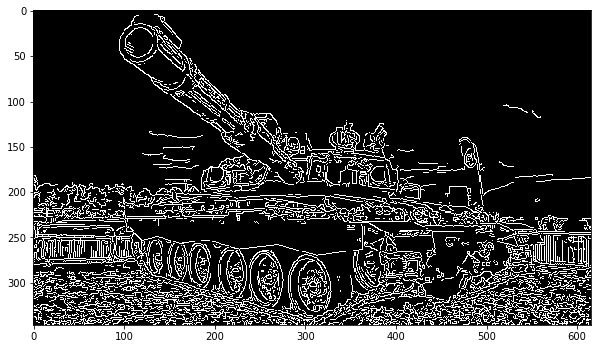

In [3]:
#easter
easter = cv.imread('data/easter.jpg',0)
plt.figure(figsize = (10,10))
plt.imshow(easter, cmap = 'gray')

canny_easter_1 = canny(easter, 1)
plt.figure(figsize = (10,10))
plt.imshow(canny_easter_1, cmap = 'gray')

canny_easter_2 = canny(easter, 2)
plt.figure(figsize = (10,10))
plt.imshow(canny_easter_2, cmap = 'gray')

#abu
abu = cv.imread('data/abu.jpg',0)
plt.figure(figsize = (10,10))
plt.imshow(abu, cmap = 'gray')

canny_abu_1 = canny(abu, 1)
plt.figure(figsize = (10,10))
plt.imshow(canny_abu_1, cmap = 'gray')

canny_abu_2 = canny(abu, 2)
plt.figure(figsize = (10,10))
plt.imshow(canny_abu_2, cmap = 'gray')

#tank
tank = cv.imread('data/tank.jpeg',0)
plt.figure(figsize = (10,10))
plt.imshow(tank, cmap = 'gray')

canny_tank_1 = canny(tank, 1)
plt.figure(figsize = (10,10))
plt.imshow(canny_tank_1, cmap = 'gray')

canny_tank_2 = canny(tank, 2)
plt.figure(figsize = (10,10))
plt.imshow(canny_tank_2, cmap = 'gray')

Komentirajte rezultate in uspešnost avtomatskih postopkov:

Objekti na slikah, ki so upragovljene s prvim načinom so bolj razločni v primerjavi z objekti slik, ki so upragovljene z Otsu metodo.

2. Na vajah smo si pogledali Houghovo transformacijo za detekcijo premic v sliki. Na podoben način lahko detektiramo tudi okrogle strukture na sliki. Naložite sliko `data/slika4.jpg` barvnih kroglic, jo zgladite z Gaussovim filtrom iz knjižnice OpenCV z velikosto jedra $3 \times 3$, ter nato uporabite OpenCV funkcijo `HoughCircles` za detekcijo središč in radijev krožnic. Kot rezultat detekcije na originalno sliko superponirajte narisane krožnice (funkcija `circle`) detektiranih kroglic. Število detektiranih kroglic tudi izpišite. Na podlagi barvnega tona (iz $HSV$ prostora) središča krožnice avtomatsko preštejte število kroglic vsake barve. Opozorilo: funkcija `HoughCircles` že sama uporabi Cannyjev detektor robov, pragova pa podate kot parametra `param1` in `param2`, zato je vhodna slika v funkcijo sivinska slika in ne slika robov kot je bilo to na vajah. Pravilno izbiro pragov pa vseeno poiščite s klicem funkcije `Canny` in prikazom njenega rezultata.

Napišite kodo za detekcijo krožnic:

In [4]:
img = cv.imread('./data/slika4.jpg', 0)
img = cv.GaussianBlur(img, (3,3), 5)

#določanje pragov
# To, img_otsu = cv.threshold(img,0,255,cv.THRESH_OTSU)
# Tl = To/2
# Th = To
# #določanje leg kroglic
# circles = cv.HoughCircles(img, cv.HOUGH_GRADIENT, 2, 40, param1=Th,param2=Tl,minRadius=30,maxRadius=60)

def getCircles(iImage, accSize, minDistBetweenCircleCenters, minRadius, maxRadius):
    iImage = cv.cvtColor(iImage, cv.COLOR_BGR2GRAY)
    iImage = cv.GaussianBlur(iImage, (3,3), 5)
    #določanje pragov
    Tl = 30
    Th = 170
    #določanje leg kroglic
    circles = cv.HoughCircles(iImage, cv.HOUGH_GRADIENT, accSize, minDistBetweenCircleCenters, param1=Th,param2=Tl,minRadius=30,maxRadius=60)
    print("število kroglic:", len(np.squeeze(circles[:,:,0])))
    return circles

def drawCircles(iImage, circles):
    x_circles = np.squeeze(circles[:,:,0])
    y_circles = np.squeeze(circles[:,:,1])
    r_circles = np.squeeze(circles[:,:,2])
    
    oImage = iImage
    for i in range(len(x_circles)):
        oImage = cv.circle(oImage, (x_circles[i],y_circles[i]), r_circles[i], (0,0,255), 2)
        print(type(oImage))
    
    return oImage

Prikažite originalno sliko s superponiranimi krožnicami in izpišite število detektiranih kroglic:

število kroglic: 36
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


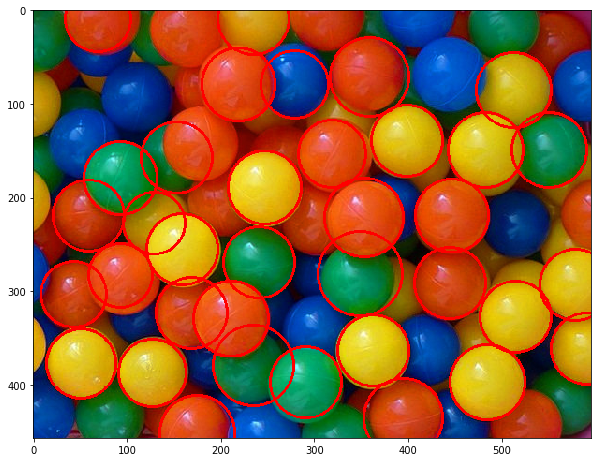

In [5]:
image = cv.imread('./data/slika4.jpg')
#image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
#getCircles(iImage, accSize, minDistBetweenCircleCenters, minRadius, maxRadius):
circles = getCircles(image, 2, 40, 20, 60)
image_circles = drawCircles(image, circles)
image_circles = cv.cvtColor(image_circles, cv.COLOR_BGR2RGB)
plt.figure(figsize = (10,10))
plt.imshow(image_circles)
# img_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)
# plt.figure(figsize = (10,10))
# plt.imshow(img_rgb)

Preštejte število kroglic vsake barve in izpišite števila:

In [435]:
img = cv.imread('./data/slika4.jpg')
img = cv.GaussianBlur(img, (11, 11), 5)
img_hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)

image_hue = img_hsv[:,:,0]
x_circles = np.squeeze(circles[:,:,0])
y_circles = np.squeeze(circles[:,:,1])
#r_circles = np.squeeze(circles[:,:,2])
x_circles = x_circles.astype(int)
y_circles = y_circles.astype(int)
#r_circles = r_circles.astype(int)

colors = np.zeros_like(x_circles)

for i in range(len(x_circles)):
    colors[i] = image_hue[y_circles[i], x_circles[i]]
    
yellow = np.mean(np.clip(colors,24,28))
orange = np.mean(np.clip(colors,4,9))
green = np.mean(np.clip(colors,78,82))
blue = np.mean(np.clip(colors,105,109))

orange_counter = 0
yellow_counter = 0
green_counter = 0
blue_counter = 0

for i in range(len(x_circles)):
    delta = 14
    
    hue_read = image_hue[y_circles[i], x_circles[i]]
    
    if ((hue_read <= orange + delta)and(hue_read >= orange - delta)):
        orange_counter = orange_counter + 1
    if ((hue_read <= yellow + delta)and(hue_read >= yellow - delta)):
        yellow_counter = yellow_counter + 1
    if ((hue_read <= green + delta)and(hue_read >= green - delta)):
        green_counter = green_counter + 1
    if ((hue_read <= blue + delta)and(hue_read >= blue - delta)):        
        blue_counter = blue_counter + 1
        
print("oranžnih žogic je:", orange_counter)
print("rumenih žogic je:", yellow_counter)
print("zelenih žogic je:", green_counter)
print("modrih žogic je:", blue_counter)

oranžnih žogic je: 16
rumenih žogic je: 14
zelenih žogic je: 6
modrih žogic je: 2


3. Z drugačno kriterijsko funkcijo, kot jo za analizo lastnih vrednosti $\lambda_1$ in $\lambda_2$ matrike $M$, $\lambda_1 >\lambda_2$, uporablja Harrisov detektor oglišč, lahko iščemo, detektiramo ali poudarjamo podolgovate strukture v sliki. Ena od tovrstnih funkcij je **linearna anizotropičnost**:
$$Q_{LA} = \frac{\lambda_1 - \lambda_2}{\lambda_1 + \lambda_2 + \beta}\,,$$
kjer je $\beta > 0$ poljubna konstanta. Napišite funkcijo za poudarjanje podolgovatih struktur v vhodni sivinski sliki `iImage`:
    ```python
    def enhanceLinear( iImage, iSigma, iBeta ):
        return oQLA
    ```
kjer je `iSigma` standardna deviacija Gaussove funkcije za glajenje elementov matrike $M$, `iBeta` pa poljubna nenegativna konstanta. Nesortirane lastne vrednosti Harrisovega detektorja lahko dobite z OpenCV funkcijo `cornerEigenValsAndVecs`.

 Naložite barvno $RGB$ sliko `data/slika5.png`, jo pretvorite v sivinsko sliko in nelinearno skalirajte z vrednostjo $\gamma=2$. Uporabite funkcijo `enhanceLinear()` za poudarjanje cest na satelitski sliki tako, da določite optimalne vrednosti parametrov `iSigma` in `iBeta`. Prikažite po vašem optimalen odziv `oQLA` s poudarjenimi podolgovatimi strukturami in izpišite izbrani vrednosti `iSigma` in `iBeta`. Z upragovljanjem odziva izluščite masko cest in jih na barvni sliki pobarvajte z rdečo barvo.

 S primerno izbiro parametrov lahko Harrisov detektor uporabimo tudi za zaznavanje okroglih struktur. Na isti sivinski in nelinearno skalirani sliki s funkcijo `cornerHarris` razmejite območja objektov in območja brez rastja. Pridobljeni odziv prikažite, njegovo razmejitev pa uporabite na barvni sliki za obarvanje teh območij z modro barvo. Ena izmed možnih rešitev je prikazana na spodnji sliki.

 ![Road detection](images/RV_5_SLO_road_detection.png)

Implementirajte funkcijo `enhanceLinear`:

In [436]:
def gammaImage(iImage, iGamma):
    iImageType = iImage.dtype
    iImage = np.array(iImage, dtype ='float')
    if iImageType.kind in ('u', 'v'):
        iMaxValue = np.iinfo(iImageType).max
        iMinValue = np.iinfo(iImageType).min
        iRange = iMaxValue - iMinValue
    else:
        iMaxValue = np.max(iImage)
        iMinValue = np.min(iImage)
        iRange = iMaxValue - iMinValue
    iImage = (iImage - iMinValue) / float(iRange)
    oImage = iImage ** iGamma
    oImage = float(iRange) * oImage + iMinValue
    
    if iImageType.kind in ('u', 'i'):
        #oImage[oImage < np.iinfo(iImageType).min] = np.iinfo(iImageType).min
        max_val = np.iinfo(iImageType).max
        min_val = np.iinfo(iImageType).min
        oImage[oImage < min_val] = min_val
        oImage[oImage > max_val] = max_val        
    return np.array(oImage, dtype=iImageType)

def thresholdImage(iImage, iThreshold):
    oImage = 255 * np.array(iImage > iThreshold, dtype='uint8')
    return oImage


In [437]:
def enhanceLinear( iImage, iSigma, iBeta ):
    iImage = cv.GaussianBlur(iImage, (3, 3), iSigma)
    eigen = cv.cornerEigenValsAndVecs(iImage, 11, 3)
    oQLA = (eigen[:,:,0] - eigen[:,:,1])/(eigen[:,:,0] + eigen[:,:,1] + iBeta)

    return oQLA

Naložite barvno $RGB$ sliko `data/slika5.png`, jo pretvorite v sivinsko sliko, jo nelinearno skalirajte z vrednostjo $\gamma=2$ ter prikažite dobljeno sliko:

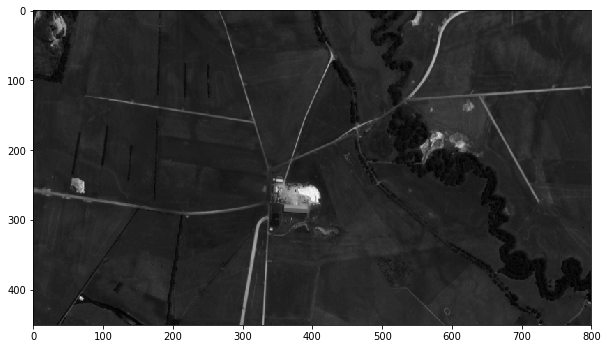

In [438]:
image = cv.imread('./data/slika5.png',0)
image = gammaImage(image, 2)
plt.figure(figsize = (10,10))
plt.imshow(image, cmap ='gray')

Poiščite optimalne parametre `iSigma` in `iBeta`. Prikažite odziv funkcije `enhanceLinear` z optimalnimi parametri in izpišite le-te parametre:

In [ ]:
image = cv.imread('./data/slika5.png',0)
image = gammaImage(image, 2)

from ipywidgets import interact

def update(sigma, beta):
    img_enh = enhanceLinear(image, sigma, beta)
    print(sigma)
    print(beta)
    plt.figure(figsize = (10,10))
    plt.imshow(img_enh, cmap='gray')

interact(update, sigma = (0.0001, 10, 0.1), beta = (0.0001, 0.01, 0.001))

#OPTIMALNI PARAMTERI:
#sigma = 0.5
#beta = 0.006

Upragovite odziv, izluščite masko cest in na originalni sliki pobarvajte ceste z rdečo barvo ter prikažite dobljeno sliko:

In [ ]:
sigma = 0.5
beta = 0.006
image_enh = enhanceLinear(image, sigma, beta)
#binarno upragovljanje
thr = np.max(image_enh)/5
image_thr = thresholdImage(image_enh, thr)
plt.figure(figsize = (12,12))
plt.imshow(image_thr, cmap = 'gray')

red_idx = np.where(image_thr > 0)
image_rgb = cv.imread('./data/slika5.png')

image_red = image_rgb[:,:,0]
image_green = image_rgb[:,:,1]
image_blue = image_rgb[:,:,2]
image_red[red_idx] = 255
image_green[red_idx] = image_green[red_idx]*0.3
image_blue[red_idx] = image_blue[red_idx]*0.3
image_rgb[:,:,0] = image_red
image_rgb[:,:,1] = image_green
image_rgb[:,:,2] = image_blue
plt.figure(figsize = (12,12))
plt.imshow(image_rgb)

Na isti sivinski in nelinearno skalirani sliki s funkcijo `cornerHarris` izluščite območja objektov in območja brez rastja. Pridobljeni odziv prikažite:

In [ ]:
image = cv.imread('./data/slika5.png',0)
image = gammaImage(image, 2)
image_corners = cv.cornerHarris(image, 40, 23, 1/10)
thr_corners = np.max(image_corners)/17
corners_thr = thresholdImage(image_corners, thr_corners)
plt.figure(figsize = (10,10))
plt.imshow(corners_thr, cmap = 'gray')

Na originalno sliko z obarvanimi cestami obarvajte z modro barvo še območja objektov ter prikažite dobljeno sliko:


In [ ]:
blue_idx = np.where(corners_thr > 0)

image_red = image_rgb[:,:,0]
image_green = image_rgb[:,:,1]
image_blue = image_rgb[:,:,2]
image_red[blue_idx] = image_red[blue_idx]*0.4
image_green[blue_idx] = image_green[blue_idx]*0.4
image_blue[blue_idx] = 255
image_rgb[:,:,0] = image_red
image_rgb[:,:,1] = image_green
image_rgb[:,:,2] = image_blue
plt.figure(figsize = (12,12))
plt.imshow(image_rgb)